## Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

## Этапы выполнения проекта

## Шаг 1. Загрузим данные и подготовим их к анализу

1.1. Загрузим данные о визитах, заказах и рекламных расходах в переменные;

1.2. Подготовим данные. Убедимся, что тип данных во всех колонках соответствует сохранённым в них значениям.

Пути к файлам:
- визиты: /datasets/visits_log.csv. 
- заказы: /datasets/orders_log.csv. 
- расходы: /datasets/costs.csv. 

## Шаг 2. Рассчитаем метрики и построем графики

Посчитаем метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразим на графиках изменения каждой метрики во времени. 

Покажем на графиках различия показателей в зависимости от типа устройства.

В рамках когортного анализа сравним метрики когорт, «проживших» одинаковый период, например 6 месяцев.


## Подробный план этого шага

### 2.1. Продуктовые метрики

- 2.1.1. Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период, а также построем график изменения метрик во времени;
- 2.1.2. Определим, сколько раз за день пользователи в среднем заходят на сайт. Выясним, как изменяется эта метрика с течением времени;
- 2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Посчитаем среднюю продолжительность пользовательской сессии за весь период. Выясним, как продолжительность сессий распределена по пользователям;
- 2.1.4. Рассчитаем Retention Rate, применяя когортный анализ.

### 2.2. Метрики электронной коммерции

- 2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
- 2.2.2. Применяя когортный анализ, рассчитаем среднее количество покупок на одного клиента за определённый период, например за 6 месяцев;
- 2.2.3. Рассчитаем среднюю выручку с пользователя. Покажем, как меняется эта метрика с течением времени;
- 2.2.4. Выясним, как меняется во времени накопительный LTV по когортам. Сравним средний LTV по когортам за 6 месяцев.

### 2.3. Маркетинговые метрики

Рассчитаем и отобразим на графиках, как маркетинговые метрики отличаются по рекламным источникам
- 2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам и как меняется это распределение во времени;
- 2.3.2. Рассчитаем CAC. Определим, сколько стоит привлечение одного покупателя из каждого источника трафика;
- 2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

## Шаг 3. Сформулируем выводы и рекомендации
- 3.1. Определим источники трафика и тип устройств, на которые маркетологам стоит делать упор. 
- 3.2. Опишем выводы, которые сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
- 3.3. Подведем итоги когортного анализа. Определим самые перспективные для компании когорты клиентов;
- 3.4. Опишем, как различаются метрики в разрезе устройств.

### Шаг 1. Загружаем данные и подготовьте их к анализу

In [1]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239 kB 985 kB/s eta 0:00:01
     |████████████████████████████████| 594 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 285 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 9.9 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 746 kB/s  eta 0:00:01
     |████████████████████████████████| 636 kB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 49.0 MB/s eta 0:00:01
     |███████████████████████████

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns
from IPython.display import display
import numpy as np

In [3]:
visits = pd.read_csv('/datasets/visits_log.csv')

In [4]:
import pandas_profiling
import ipywidgets

In [5]:
pandas_profiling.ProfileReport(visits)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [7]:
pandas_profiling.ProfileReport(orders)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
costs = pd.read_csv('/datasets/costs.csv')

In [9]:
pandas_profiling.ProfileReport(costs)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#заменим названия столбцов, приведя к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [11]:
#заменим названия некоторых столбцов для более удобной дальнейшей работы
visits = visits.rename(columns = {'end ts':'end_ts','source id':'source_id','start ts':'start_ts'})
orders = orders.rename(columns = {'buy ts':'buy_ts'})
costs = costs.rename(columns = {'dt':'date'})

In [12]:
#проверим есть ли пропущенные значения
visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [13]:
orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [14]:
costs.isna().sum()

source_id    0
date         0
costs        0
dtype: int64

В целом датасеты не имеют пропущенных значений, что удобно для дальнейшей работы. Осталось только привести к нужному типу данных

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#приведем данные к нужному типу
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['start_year'] = visits['start_ts'].dt.year
visits['start_month'] = visits['start_ts'].dt.month
visits['start_week']  = visits['start_ts'].dt.week
visits['start_date'] = visits['start_ts'].dt.date

In [17]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [18]:
costs['date'] = pd.to_datetime(costs['date'])

### 2.1 Считаем продуктовую метрику

2.1.1 Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период, а также построем график изменения метрик во времени;

In [19]:
dau_total = visits.groupby('start_date').agg({'uid': 'nunique'}).mean()
print("Ежедневная аудитория DAU {0:.2f} человек".format(dau_total[0]))

Ежедневная аудитория DAU 907.99 человек


In [20]:
wau_total = visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'}).mean()
wau_total

uid    5716.245283
dtype: float64

In [21]:
mau_total = visits.groupby(['start_year', 'start_month']).agg({'uid':'nunique'}).mean()
mau_total

uid    23228.416667
dtype: float64

2.1.2. Определим, сколько раз за день пользователи в среднем заходят на сайт. Выясним, как изменяется эта метрика с течением времени;

In [22]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
sessions_per_user = visits.groupby(['start_date']).agg({'uid': ['count']}).mean()
print('Среднее количество сессий в день', int(sessions_per_user))

Среднее количество сессий в день 987


2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Посчитаем среднюю продолжительность пользовательской сессии за весь период. Выясним, как продолжительность сессий распределена по пользователям;

In [23]:
#посчитайте продолжительность сессий
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

In [24]:
visits['duration_sec'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: duration_sec, dtype: float64

Есть отрицательные значения, удалим их

In [25]:
visits = visits.query('duration_sec >= 0')

In [26]:
visits['duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: duration_sec, dtype: float64

<a class="anchor" id="21-bullet">

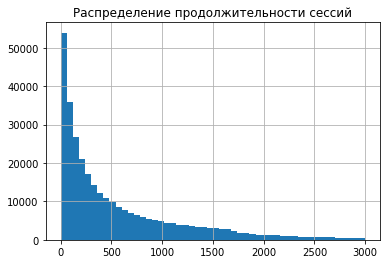

In [27]:
visits['duration_sec'].hist(bins=50,range=[1,3000])
plt.title('Распределение продолжительности сессий');

In [28]:
print('Самая часто встречающаяся продолжительность сессии -',visits['duration_sec'].mode())

Самая часто встречающаяся продолжительность сессии - 0    60.0
dtype: float64


2.1.4. Рассчитаем Retention Rate, применяя когортный анализ.

In [29]:
# добавим год/месяц первого визита , чтобы сформировать когорты
first_visits = visits.groupby('uid')['start_ts'].min()
first_visits.name='first_visit'
visits = visits.join(first_visits, on='uid')
visits['first_visit'] = visits['first_visit'].astype('datetime64[M]')

visits.head()

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_date,duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080.0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680.0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440.0,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0,2017-12-01


In [30]:
# добавим год/месяц визита
visits['visit_month'] =  visits['start_ts'].astype('datetime64[M]')
visits['lifetime'] = ((visits['visit_month'] - visits['first_visit']) / np.timedelta64(1,'M')).round().astype('int')

In [31]:
# посчитаем сколько пользвателей было в каждой когорте в определенный lifetime
visit_cohorts = visits.groupby(['first_visit','lifetime'])['uid'].nunique().reset_index()
visit_cohorts.head()

,first_visit,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [32]:
# сохраним сколько пользователей было в 0ой lifetime в каждой когорте
initial_cohorts_users = visit_cohorts[visit_cohorts['lifetime'] == 0][['first_visit','uid']]
initial_cohorts_users.rename(columns={'uid':'initial_users'}, inplace=True)
initial_cohorts_users.head()

,first_visit,initial_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [33]:
visit_cohorts = visit_cohorts.merge(initial_cohorts_users, on='first_visit')

In [34]:
visit_cohorts['retention'] = (visit_cohorts['uid']/visit_cohorts['initial_users'])*100
visit_cohorts.pivot_table(index='first_visit', columns='lifetime', 
                          values='retention', aggfunc='mean',fill_value='')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit,,,,,,,,,,,,
2017-06-01,100.0,7.866355,5.377479,6.139226,6.855721,7.142318,6.101516,5.777208,5.234181,5.08334,4.065163,4.49506
2017-07-01,100.0,5.608828,5.129376,5.616438,5.821918,4.817352,4.535769,4.57382,3.881279,2.861492,2.747336,
2017-08-01,100.0,7.690797,6.286219,6.276397,5.009331,4.400354,3.634221,3.948532,2.78951,2.602888,,
2017-09-01,100.0,8.548851,6.920498,5.070642,3.939176,3.783525,3.585967,2.418582,2.280891,,,
2017-10-01,100.0,7.8608,5.223852,3.895754,3.426108,3.222081,2.136505,2.036417,,,,
2017-11-01,100.0,7.828097,4.411333,3.868174,3.372725,2.341456,2.179977,,,,,
2017-12-01,100.0,5.58018,3.799272,3.110654,2.026278,1.903593,,,,,,
2018-01-01,100.0,5.971535,3.933876,2.497348,2.024399,,,,,,,
2018-02-01,100.0,5.707979,2.545389,2.009281,,,,,,,,


Retention rate показывает, что на следующий месяц жизни мы теряем большую часть пользователей из когорты. Однако, в последующем отток становится уже не таким существенным, и с нами остается достаточно лояльная аудитория. По первой когорте в крайний год жизни видим даже увеличение retention. 

Из анализа выяснилось, что каждый день сервисом пользуется в среднем около 1000 пользователей, в то время как среднее количество сессий тоже около 1000, то есть один пользователей, как правило незаходит за день дважды. Так же, судя по графику распределения, пользователям хватает около 5 минут нахождения в Я.Афише.

### 2.2. Считаем метрику электронной коммерции

2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;

In [35]:
# найдем дату первой покупки и добавим в df с покупками
first_buy = orders.groupby('uid')['buy_ts'].min()
first_buy.name = 'first_buy' 
orders = orders.join(first_buy, on='uid')
orders['first_buy_month'] = orders['first_buy'].astype('datetime64[M]')

In [36]:
# добавим в таблицу с визитами данные о первой покупке левым мерджем, так как не все посетители совершают покупки
visits = visits.merge(orders[['uid','first_buy_month']], on='uid', how='left')

In [37]:
# посчитаем сколько дней проходит между первой покупкой и первым визитом
visits['days_before_first_order'] = ((visits['first_buy_month'] - visits['first_visit'])/ np.timedelta64(1,'D')).astype('Int64')

In [38]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [39]:
visits[visits['device'] == 'touch']['days_before_first_order'].describe()

count    48615.000000
mean        53.949913
std         78.486479
min          0.000000
25%          0.000000
50%          0.000000
75%         92.000000
max        334.000000
Name: days_before_first_order, dtype: float64

In [40]:
visits[visits['device'] == 'desktop']['days_before_first_order'].describe()

count    713192.000000
mean         13.702778
std          37.808490
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         334.000000
Name: days_before_first_order, dtype: float64

Выяснили, что среднее время между первой покупкой и первым визитом для мобильных устрйоств - 53 дня, для декстопов 13. Находятся посетители, которым требуется почти год на то чтобы решиться что-то купить, по всей видимости это значение слишком завышено. Медиана же тут более показательна, она равна 0 у всех устройств, значит в большинстве случаев первая покупка приходится на первый визит. Построим гистограмму, чтобы убедиться.

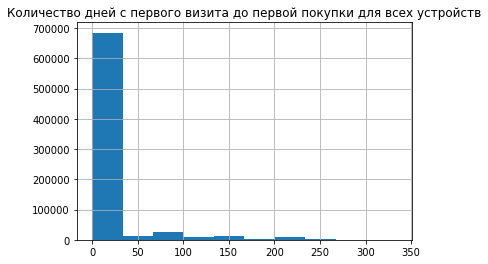

In [41]:
visits.loc[visits['days_before_first_order'].notna(),'days_before_first_order'].hist()
plt.title('Количество дней с первого визита до первой покупки для всех устройств')
plt.show()

2.2.2. Применяя когортный анализ, рассчитаем среднее количество покупок на одного клиента за определенный период

In [42]:
orders['year'] = orders['buy_ts'].dt.year
orders['month'] = orders['buy_ts'].dt.month
orders['week'] = orders['buy_ts'].dt.week
orders['day'] = orders['buy_ts'].dt.date

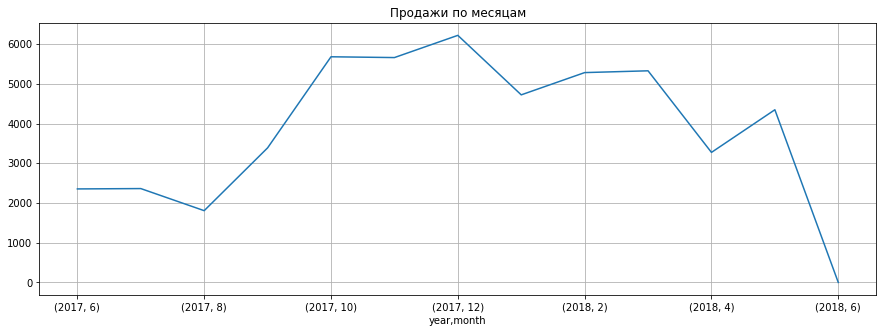

In [43]:
axs = plt.subplots(figsize=(15,5))
orders.groupby(['year','month'])['revenue'].count().plot(grid=True).set_title('Продажи по месяцам')
plt.show()

2.2.3. Рассчитаем среднюю выручку с пользователя

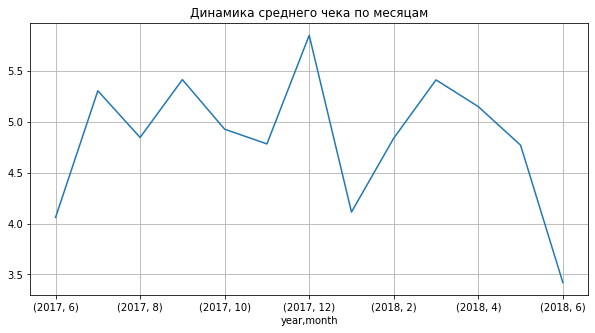

In [44]:
plt.figure(figsize=(10, 5))
orders.groupby(['year','month'])['revenue'].mean().plot(grid=True)
plt.title('Динамика среднего чека по месяцам')
plt.show()

Средний чек колеблится от 4 - 5,75 у.е., пиковые значения были под НГ (что не удивительно). И вроде бы после январского спада пошел подъем, но потом опять падение.

2.2.4. Выясним, как меняется во времени накопительный LTV по когортам.

In [45]:
# определим месяц покупки 
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [46]:
# посчитаем количество пользователей каждой когорты 
orders_cohort_size = orders.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index()
orders_cohort_size.columns = ['first_buy_month', 'buyers']
orders_cohort_size

,first_buy_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [47]:
# рассчитаем выручку каждой когорты по месяцам и объединим таблицу с количеством пользователей и выручкой
orders_revenue = orders.groupby(['first_buy_month', 'buy_month'])['revenue'].sum().reset_index()
ltv_report = pd.merge(orders_cohort_size,orders_revenue, on='first_buy_month')

In [48]:
# выделим срок жизни когорт, посчитаем ltv и посмотрим на результат
ltv_report['age'] = ((ltv_report['buy_month'] - ltv_report['first_buy_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_report['ltv'] = ltv_report['revenue']/ltv_report['buyers']
ltv_report.pivot_table(index='first_buy_month', values='ltv', columns='age', 
                       aggfunc='sum', fill_value='', margins=True)

age,0,1,2,3,4,5,6,7,8,9,10,11,All
first_buy_month,,,,,,,,,,,,,
2017-06-01 00:00:00,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856,11.879234
2017-07-01 00:00:00,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,,8.386854
2017-08-01 00:00:00,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,,8.471723
2017-09-01 00:00:00,5.644529,1.117586,0.52093,3.975792,0.400558,0.647067,0.701608,0.24315,0.184006,,,,13.435227
2017-10-01 00:00:00,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,,6.360242
2017-11-01 00:00:00,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,,6.395244
2017-12-01 00:00:00,4.738191,0.260374,0.925097,1.065275,0.31293,0.338047,,,,,,,7.639913
2018-01-01 00:00:00,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,,4.940151
2018-02-01 00:00:00,4.156987,0.278274,0.078515,0.074144,,,,,,,,,4.587921


В среднем пользователи начинают покупать на 13 (десктопы) и 53 (мобильные) день. Однако, чаще всего это происходит в день первого визита. 

Пик покупок пришелся на первое полугодие и это связано с активностью на НГ, там было зафиксировано большее всего покупок. В свою очередь, месячный средний чек находится в районе +-5 у.е. с пиковым значением на НГ и падением в январе.

Самой прибыльной когортой оказалась 2017-09-01, и, естественно, самая первая, в силу того что она старше всех.

### Маркетинговые метрики

2.3.1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам и как меняется это распределение во времени;



In [49]:
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [50]:
print('Всего потрачего на продвижение -',costs['costs'].sum())

Всего потрачего на продвижение - 329131.62


In [51]:
print('Выручка всего -',orders['revenue'].sum())

Выручка всего - 252057.19999999998


Можно заметить, что валовая прибыль отрицательная

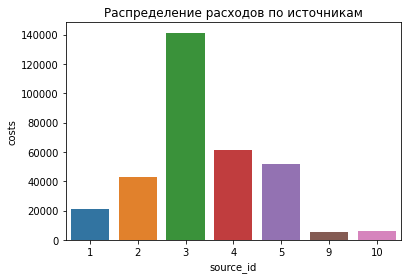

In [52]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
sns.barplot(x="source_id", y="costs", data=costs_by_source)
plt.title('Распределение расходов по источникам')
plt.show()

Итого, на источник № 3 мы потратили значительно больше чем на все остальные.

In [53]:
costs['date_month'] = costs['date'].astype('datetime64[M]')

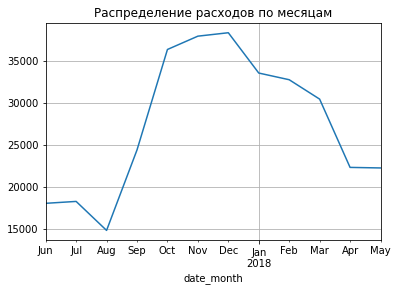

In [54]:
costs_by_months = costs.groupby(['date_month'])['costs'].sum()
costs_by_months.plot(grid=True, title='Распределение расходов по месяцам')
plt.show()

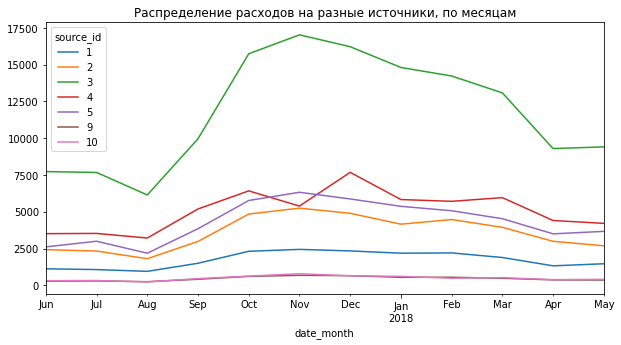

In [55]:
sources_costs_by_month = costs.pivot_table(index='date_month', columns='source_id', values='costs', aggfunc='sum')
sources_costs_by_month.plot(figsize=(10, 5), title='Распределение расходов на разные источники, по месяцам')
plt.show()

In [56]:
# определим количество первых заходов из каждого источника
original_source = visits.groupby(['uid','source_id','device'])['start_ts'].min().reset_index()
original_source_count = original_source.groupby('source_id')['uid'].count().reset_index().rename(columns={'uid':'n_users'})
original_source_count

,source_id,n_users
0,1,19266
1,2,26866
2,3,76020
3,4,84920
4,5,57428
5,6,6
6,7,34
7,9,9481
8,10,8144


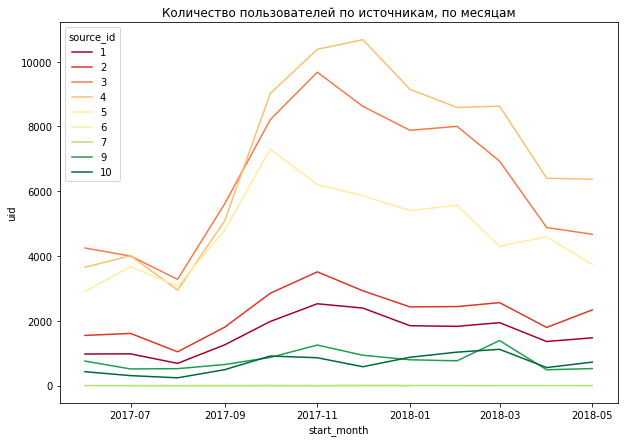

In [57]:
# дополнительно визуализируем количество пользователей из разных истоничков по месяцам
original_source['start_month'] = original_source['start_ts'].astype('datetime64[M]')
original_source_by_month = original_source.groupby(['start_month','source_id'])['uid'].count().reset_index()
plt.figure(figsize=(10, 7))
plt.title('Количество пользователей по источникам, по месяцам')
sns.lineplot(data=original_source_by_month,x='start_month', hue='source_id', y='uid', legend='full', palette='RdYlGn')
plt.show()

2.3.2. Рассчитаем CAC. Определим, сколько стоит привлечение одного покупателя из каждого источника трафика;

<a class="anchor" id="22-bullet">

In [58]:
cac_review = orders\
    .merge(visits.sort_values(by='start_ts').groupby('uid').agg({'source_id':'first'}).reset_index(), on='uid')\
    .groupby(['first_buy_month', 'source_id'], as_index=False).agg({'uid': 'nunique'})\
    .merge(costs.groupby(['date_month', 'source_id'], as_index=False).agg({'costs': 'sum'}).rename(columns={'date_month': 'first_buy_month'}), on=['first_buy_month', 'source_id'])\
    .assign(cac = lambda row: row['costs'] / row['uid'])
cac_review

,first_buy_month,source_id,uid,costs,cac
0,2017-06-01,1,190,1125.61,5.924263
1,2017-06-01,2,235,2427.38,10.329277
2,2017-06-01,3,638,7731.65,12.118574
3,2017-06-01,4,413,3514.80,8.510412
4,2017-06-01,5,384,2616.12,6.812813
...,...,...,...,...,...
79,2018-05-01,3,844,9411.42,11.150972
80,2018-05-01,4,804,4214.21,5.241555
81,2018-05-01,5,497,3669.56,7.383421
82,2018-05-01,9,60,362.17,6.036167


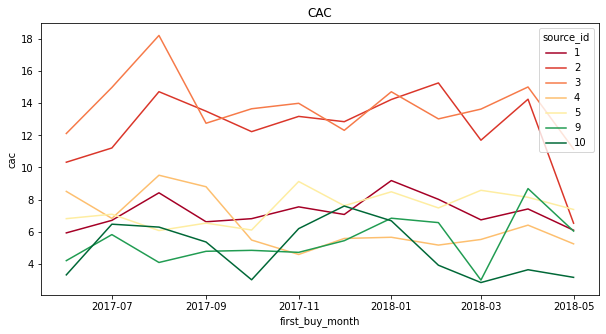

In [59]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=cac_review, x='first_buy_month', y='cac', hue='source_id', legend='full', palette='RdYlGn')
plt.title('CAC');

Дешевле всего обошлись посетители из 6 и 7 источника, расходов нет по этим источникам 

Далее самые дешевые источники: 9, 10

Видно, что самые дорогие пользователи из источника - 3 и 2. Может не стоит так много тратить на них, учитывая что из 4го (дешевого), к нам приходит на много больше пользователей чем с 3го. И второй тоже не выглядит сильно перспективным, в то время как с не дорого 5го мы получили больше клиентов.

2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

In [60]:
romi_report = ltv_report.merge(costs_by_months, left_on='first_buy_month', right_on='date_month')
romi_report['cac'] = romi_report['costs'] / romi_report['buyers']
romi_report['romi'] = (romi_report['ltv'] /  romi_report['cac']).round(2)

In [61]:
# приводим дату в более читабельный вид
romi_report['first_buy_month'] = romi_report['first_buy_month'].dt.strftime('%Y-%m')

Cделаем проверку. Результаты таблиц romi_report и cac_review должны быть похожи

In [62]:
romi_report.groupby('first_buy_month').agg({'cac':'mean'})

,cac
first_buy_month,
2017-06,8.905091
2017-07,9.485486
2017-08,10.796015
2017-09,9.441654
2017-10,8.369327
2017-11,9.288870
2017-12,8.741809
2018-01,9.937302
2018-02,8.962758


In [63]:
cac_review.groupby('first_buy_month').agg({'cac': 'mean'})

,cac
first_buy_month,
2017-06-01,7.313904
2017-07-01,8.444521
2017-08-01,9.618958
2017-09-01,8.336191
2017-10-01,7.446573
2017-11-01,8.477261
2017-12-01,8.353483
2018-01-01,9.399983
2018-02-01,8.490899


Проверка выполнена

In [64]:
romi = romi_report.pivot_table(index='first_buy_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)

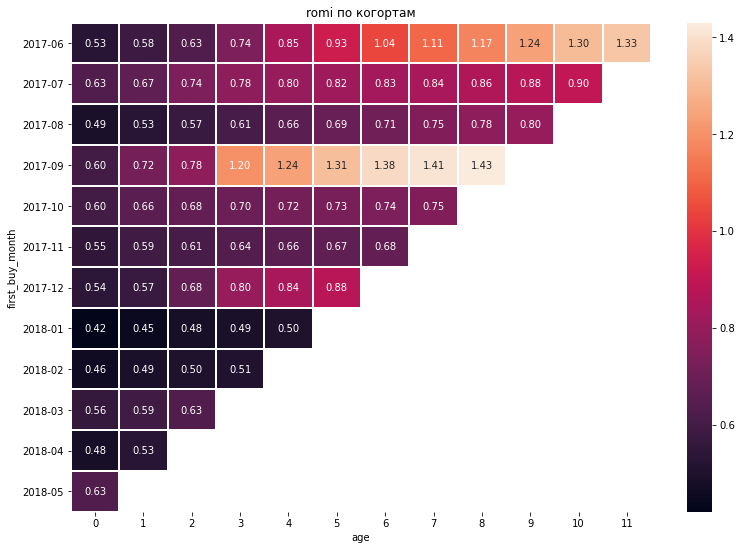

In [65]:
plt.figure(figsize=(13, 9))
plt.title('romi по когортам')
sns.heatmap(romi,annot=True, fmt='.2f', linewidths=1)
plt.show()

Как было отмечено ранее, когорта 2017-09-01 одна из лучших для бизнеса, вышла на окупаемость уже на 3 месяц. Кроме неё окупилась только самая первая когорта, на 6ой месяц жизни. И вторая когорта наиболее близка к тому, чтобы окупиться. Можно отметить, что почти каждая когорта в нулевой месяц жизни окупает свое привлечение +- на половину. Далее, из-за больших потерь пользователей для каждой когорты, окупаемость уже растет не так быстро.

### Шаг 3. Выводы и рекомендации

В работе были достаточно качественные датасеты, ошибок и проблем с ними было мало.

Что мы узнали о продукте и какие рекомендации можно дать. Как оказалось, retention Я.Афиши достаточно скромный (по крайней мере был), уже на первый месяц жизни к нам возвращается около 7% пользователей, и почти для каждой новой когорты этот показатель уменьшается. Что неминуемо скзывается на прибыли, окупилось только 2 когорты, следовательно мы в минусе. Необходимо работать над удержанием пользователей, стимулировать их совершать больше покупок, устаривать акции и т.п.

Как показали графики выше, мы получаем больше всего пользователей из источника 4, в то время как тратим на привлечение не так много денег. Как минимум можно взять большу часть бюджета 2го источника и перенаправить на 4ый. Так как из второго мы получаем малый отклик. Аналогично нужно поступить с 5ым, его пользователи не дорогие, но оттуда мы имеем хороший поток посетителей, сопоставымий с 3им, который несмотря на свою дороговизну не оправдывает ожиданий.

Нелишним будет дополнительно изучить среднее время покупки на мобильных устройствах, почему-то оно значительно выше чем у десктопов. Возможно есть сложности с оплатой в приложени.